<a href="https://colab.research.google.com/github/Zeinab-E/RL-Project/blob/main/Lab6_RobotDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python
import cv2
print(cv2.__version__)


4.11.0


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_FILE = "shapes.png"

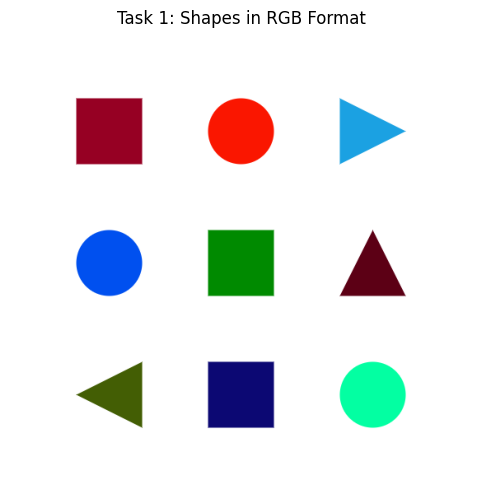

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from PIL import Image

# Load the "shapes.png" image
shapes_path = "/content/shapes.png"
shapes_bgr = cv2.imread(shapes_path)

# Convert BGR to RGB
shapes_rgb = cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(shapes_rgb)
plt.title("Task 1: Shapes in RGB Format")
plt.axis("off")
plt.show()


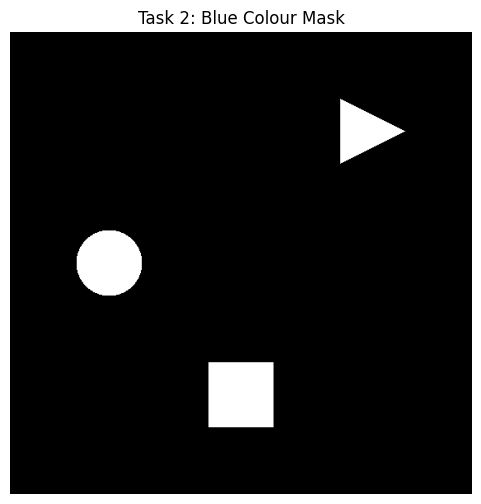

In [4]:
# Task 2: Colour Mask (Blue)
# Convert image to HSV
shapes_hsv = cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2HSV)

# Define blue color range in HSV
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])

# Create a binary mask where blue colors are white
blue_mask = cv2.inRange(shapes_hsv, lower_blue, upper_blue)

# Show the blue mask
plt.figure(figsize=(6, 6))
plt.imshow(blue_mask, cmap='gray')
plt.title("Task 2: Blue Colour Mask")
plt.axis("off")
plt.show()

# # Task 3: Bitwise Operation
# # Apply bitwise AND to original image using the mask
# blue_segment = cv2.bitwise_and(shapes_rgb, shapes_rgb, mask=blue_mask)

# # Show the result of bitwise AND
# plt.figure(figsize=(6, 6))
# plt.imshow(blue_segment)
# plt.title("Task 3: Blue Segment Isolated Using Mask")
# plt.axis("off")
# plt.show()


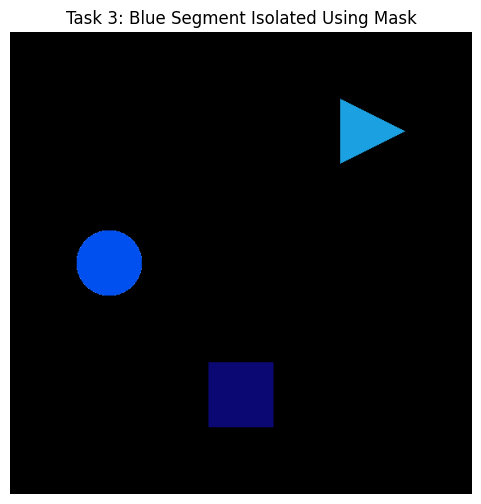

In [5]:


# Task 3: Bitwise Operation
# Apply bitwise AND to original image using the mask
blue_segment = cv2.bitwise_and(shapes_rgb, shapes_rgb, mask=blue_mask)

# Show the result of bitwise AND
plt.figure(figsize=(6, 6))
plt.imshow(blue_segment)
plt.title("Task 3: Blue Segment Isolated Using Mask")
plt.axis("off")
plt.show()


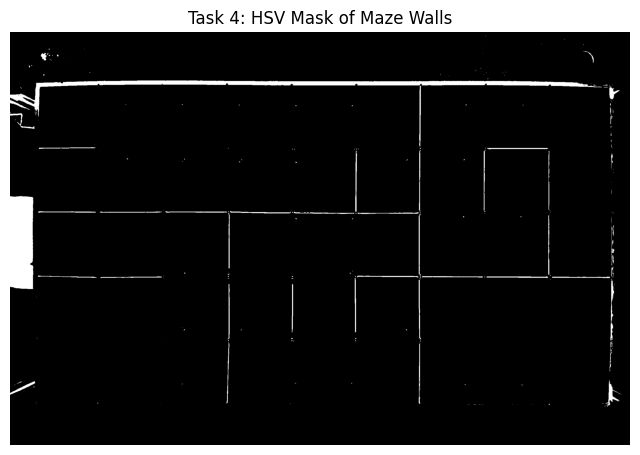

In [6]:
# Load maze image and convert to HSV
maze_path = "/content/maze.jpg"
maze_bgr = cv2.imread(maze_path)
maze_hsv = cv2.cvtColor(maze_bgr, cv2.COLOR_BGR2HSV)

# Use a rough HSV range for dark walls (adjust based on hsv_picker if needed)
lower_wall = np.array([0, 0, 0])         # dark color
upper_wall = np.array([180, 255, 80])    # dark gray

# Create mask
maze_mask = cv2.inRange(maze_hsv, lower_wall, upper_wall)

# Show HSV mask of the maze
plt.figure(figsize=(8, 8))
plt.imshow(maze_mask, cmap='gray')
plt.title("Task 4: HSV Mask of Maze Walls")
plt.axis("off")
plt.show()


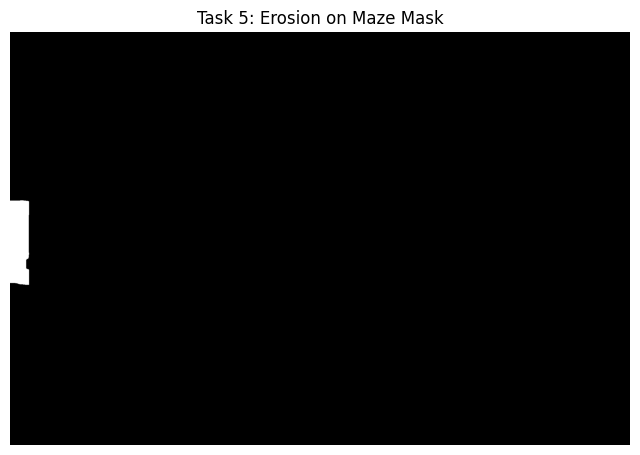

In [7]:
# Task 5: Erosion
# Create a kernel of size 7x7
kernel_erode = np.ones((7, 7), np.uint8)

# Apply erosion (5 iterations)
maze_eroded = cv2.erode(maze_mask, kernel_erode, iterations=5)

# Show eroded mask
plt.figure(figsize=(8, 8))
plt.imshow(maze_eroded, cmap='gray')
plt.title("Task 5: Erosion on Maze Mask")
plt.axis("off")
plt.show()

# # Task 6: Dilation
# # Create a kernel of size 3x3
# kernel_dilate = np.ones((3, 3), np.uint8)

# # Apply dilation (5 iterations)
# maze_dilated = cv2.dilate(maze_mask, kernel_dilate, iterations=5)

# # Show dilated mask
# plt.figure(figsize=(8, 8))
# plt.imshow(maze_dilated, cmap='gray')
# plt.title("Task 6: Dilation on Maze Mask")
# plt.axis("off")
# plt.show()


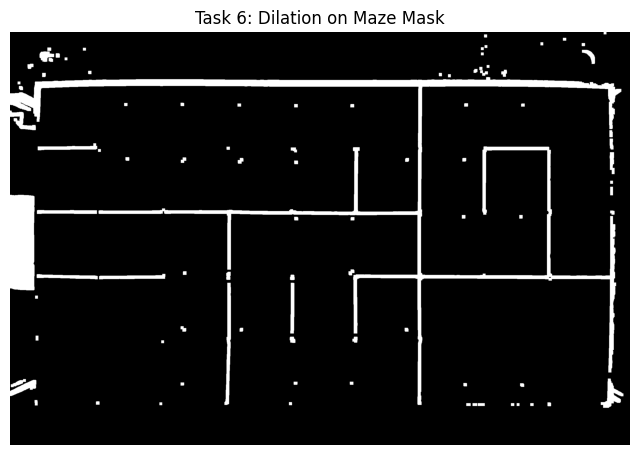

In [8]:


# Task 6: Dilation
# Create a kernel of size 3x3
kernel_dilate = np.ones((3, 3), np.uint8)

# Apply dilation (5 iterations)
maze_dilated = cv2.dilate(maze_mask, kernel_dilate, iterations=5)

# Show dilated mask
plt.figure(figsize=(8, 8))
plt.imshow(maze_dilated, cmap='gray')
plt.title("Task 6: Dilation on Maze Mask")
plt.axis("off")
plt.show()


In [9]:
# Resize mask to smaller resolution for ASCII conversion
resized_maze = cv2.resize(maze_eroded, (40, 40), interpolation=cv2.INTER_AREA)

# Convert to ASCII characters
ascii_chars = [' ', '#']  # ' ' for path (black), '#' for wall (white)

ascii_output = ""
for row in resized_maze:
    line = ""
    for pixel in row:
        char = ascii_chars[1] if pixel > 127 else ascii_chars[0]
        line += char
    ascii_output += line + "\n"

# Print the ASCII representation
print("Extension 1: ASCII Representation of Maze\n")
print(ascii_output)


Extension 1: ASCII Representation of Maze

                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        
#                                       
#                                       
#                                       
#                                       
#                                       
#                                       
#                                       
#             

In [10]:
# Save ASCII maze representation to a text file
ascii_file_path = "/content/ascii_maze.txt"

with open(ascii_file_path, "w") as file:
    file.write("Extension 1: ASCII Representation of Maze\n\n")
    file.write(ascii_output)

ascii_file_path  # Provide the path for download


'/content/ascii_maze.txt'